In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

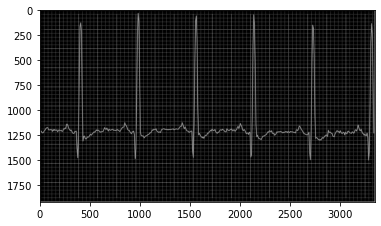

In [2]:
DATADIR = "C:/Users/WJI/Pictures/ECG Figures Normal vs Not"
CATEGORIES = ["Normal", "Not Normal"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(1916, 3348)


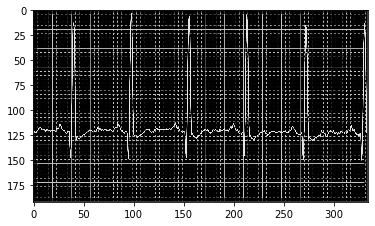

In [4]:
x_SIZE = 335
y_SIZE = 192
new_array = cv2.resize(img_array, (x_SIZE, y_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [5]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (x_SIZE, y_SIZE))
                training_data.append([new_array, class_num])
        
            except Exception as e:
                pass
        
create_training_data()

In [6]:
print(len(training_data))

115


In [7]:
import random
random.shuffle(training_data)


In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
1
0
1
1


In [9]:
ECG_X_train = []
ECG_y_train = []
for features, label in training_data:
    ECG_X_train.append(features)
    ECG_y_train.append(label)

ECG_X_train = np.array(ECG_X_train).reshape(-1,x_SIZE,y_SIZE,1)
ECG_y_train = np.array(ECG_y_train)

print(ECG_X_train.shape)
print(ECG_y_train)

(115, 335, 192, 1)
[1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 1]


In [10]:
import pickle

pickle_out = open("MK2ECG_X_train.pickle","wb")
pickle.dump(ECG_X_train, pickle_out)
pickle_out.close()

pickle_out = open("MK2ECG_y_train.pickle","wb")
pickle.dump(ECG_y_train, pickle_out)
pickle_out.close()

In [11]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
0
1
1
1
1


In [12]:
ECG_X_test = []
ECG_y_test = []
for features, label in training_data:
    ECG_X_test.append(features)
    ECG_y_test.append(label)

ECG_X_test = np.array(ECG_X_test).reshape(-1,x_SIZE,y_SIZE,1)
ECG_y_test = np.array(ECG_y_test)

print(ECG_X_test.shape)
print(ECG_y_test)

(115, 335, 192, 1)
[1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1
 0 0 1 0]


In [13]:
pickle_out = open("MK2ECG_X_test.pickle","wb")
pickle.dump(ECG_X_test, pickle_out)
pickle_out.close()

pickle_out = open("MK2ECG_y_test.pickle","wb")
pickle.dump(ECG_y_test, pickle_out)
pickle_out.close()
